In [32]:
!pip install PyMuPDF

     ---------------------------------------- 6.6/6.6 MB 4.8 MB/s eta 0:00:00


In [1]:
import camelot
import matplotlib.pyplot as plt
import sys, fitz

In [98]:
#file =  r'D:\НИР Бакалавра\Documents\Отчет 8 семестр\Отзыв_НИР_бакалавра_2021_6409_Богданова.pdf' #'TableExample.pdf'
file = 'Перечень тем ВКР год бакалавриат. Тема работы на русском языке.pdf'

In [99]:
# doc = fitz.open(file)  # open document
# page = doc.load_page(0)
# pix = page.get_pixmap() # render page to an image
# pix.save("page1.png")  # store image as a PNG
# # for page in doc:  # iterate through the pages
# #     pix = page.get_pixmap()  # render page to an image
# #     pix.save("page-%i.png" % page.number)  # store image as a PNG

In [100]:
doc = fitz.open(file)  # open document
page = doc.load_page(0)
pix = page.get_pixmap()  # render page to an image
pix.save('output.png')

In [105]:
# USE this to not install gohstscript
class ConversionBackend(object):
    def convert(self, pdf_path, png_path):
        # read pdf page from pdf_path
        # convert pdf page to image
        # write image to png_path
        doc = fitz.open(pdf_path)  # open document
        page = doc.load_page(0)
        pix = page.get_pixmap()  # render page to an image
        pix.save(png_path)


tables = camelot.read_pdf(file, 
                          backend=ConversionBackend(), 
                          strip_text='\n', 
                          line_scale=40, 
                          flag_size=True, )
                          #copy_text=['h', 'v'],)  # shift_text=[''])

In [106]:
tables[0].df

,0,1,2,3
0,№ п/п,Руководитель работы,Тема работы на русском языке,Тема работы на английском языке
1,1,Бабкина Т.С.,Проектирование и реализация алгоритма формальн...,Design and Implementation of Formal Inference ...
2,2,Бычков И.С.,"""Гиперэвристический алгоритм для построения оп...",Hyper-Heuristic Algorithm for Train Timetablin...
3,3,Гречихин И.С.,Обучение сверточных сетей с зашумленными метками,Training Convolutional Networks with Noisy Labels
4,4,Грибанов Д.В.,Двумерная задача квазивыпуклой целочисленной м...,Two-dimensional Problem of Quasi-Convex Intege...
5,5,Дурандин О.В.,Сравнение процедур выбора одной из многих гипотез,Comparison of the Procedures of Selecting one ...
6,6,Дурандин О.В.,Учет синтаксиса в глубоком обучении при решени...,The Use of Syntax in Deep Learning Sentiment A...
7,7,Золотых Н.Ю.,Визуализация журнала выполнения программы с ис...,Visualization of the Program Execution Log Usi...


In [30]:
tables[0]

<Table shape=(16, 17)>

In [59]:
tables[0].df.iloc[1][9]

''

In [61]:
tables[0].df.iloc[4] #row
print(tables[0].df.iloc[4].keys())
for i in tables[0].df.iloc[4].keys():
    print(i)

RangeIndex(start=0, stop=17, step=1)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [47]:
import pandas as pd

In [62]:
students = [('Ankit', 22, 'A'),
           ('Swapnil', 22, 'B'),
           ('Priya', 22, 'B'),
           ('Shivangi', 22, 'B'),
            ]
 
# Create a DataFrame object
stu_df = pd.DataFrame(students, columns =['Name', 'Age', 'Section'],
                      index =['1', '2', '3', '4'])

In [63]:
stu_df

,Name,Age,Section
1,Ankit,22,A
2,Swapnil,22,B
3,Priya,22,B
4,Shivangi,22,B


In [64]:
stu_df.iloc[1]

Name       Swapnil
Age             22
Section          B
Name: 2, dtype: object

In [66]:
for i in stu_df.iloc[1].keys():
    print(i)

Name
Age
Section


In [70]:
row2 = stu_df.iloc[1]
for i in range(len(row2)):
    print(row2[i])

Swapnil
22
B


In [68]:
for i in stu_df.iloc[1].keys():
    print(i)
    #print(stu_df.iloc[1][i])
for i in stu_df.shape[1]:
    print(i)

Name


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [75]:
# Fill in empty cells exept header
# Fill horizontally
# Для каждой колонки: Берем колонку, для каждой строки если она пустая ищем не пустую по колонкам
def fill_horizontal(row):
    for i in range(len(row)):
        if row[i] =='':
            row[i] = row[i-1]
            
tables[0].df.apply(fill_horizontal, axis=1)

# Fill vertically

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
dtype: object

In [76]:
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,N,EmployeeID,Recorddatekey,Birthdatekey,Orighiredatekey,Terminationdatekey,age,Lengthofservice17,Cityname,Departmentname,JobtitleCEO,STATUS,BUSINESSUNIT,Personalinformation,Personalinformation,Personalinformation,STATUSYEAR
1,N,EmployeeID,Recorddatekey,Birthdatekey,Orighiredatekey,Terminationdatekey,age,Lengthofservice17,Cityname,Departmentname,JobtitleCEO,STATUS,BUSINESSUNIT,Gendershort:1.M2.F,Genderfull,Termreasondesc,STATUSYEAR
2,1,1318,12/31/20070:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2006
3,2,1318,12/31/20080:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2007
4,3,1318,12/31/20090:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2008
5,4,1318,12/31/20100:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2009
6,5,1318,12/31/20110:00,1/1/1900,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2010
7,6,1318,12/31/20120:00,1/1/1900,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2011
8,7,1318,12/31/20130:00,1/1/1900,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2012
9,8,1318,12/31/20130:00,1/1/1900,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,ACTIVE,HEADOFFICE,1.M,Male,NotApplicable,2013


In [8]:
tables[0].to_excel("table_result4.xlsx", index=False, header=False)

C:\Users\Julia\AppData\Local\Temp\ipykernel_13444\311955129.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='grid').show()


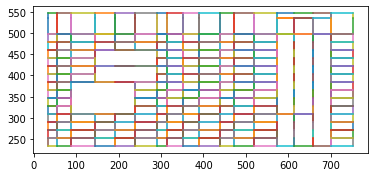

In [7]:
camelot.plot(tables[0], kind='grid').show()

C:\Users\Julia\AppData\Local\Temp\ipykernel_12980\2005142002.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


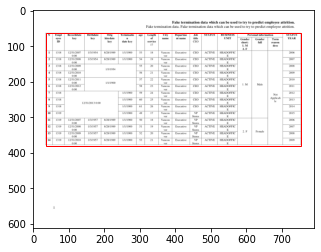

In [59]:
camelot.plot(tables[0], kind='contour').show()

In [5]:
tables[0].df[:5]

,0,1,2,3,4,5
0,N \nEmpl\noyee \nID \n1 \n1318 \n12/31/2007 \...,Recorddate \nkey,Birthdate \nOrig \nkey \nhiredate \nkey,Terminatio\nage \nLength \nCity \nDepartme\nJo...,BUSINESS \nUNIT,Personal information \nSTATUS \nYEAR \nGender ...
1,,,,,,2006 \n2007 \n2008 \n2009 \n2010 \n1. M \nMale...
2,,12/31/2013 0:00,,1/1/1900 \n59 \n24 \nVancou\nExecutive \nCEO \...,,2012 \nNot \nApplicab\n2013 \nle \n2014 \n2015
3,11 \n1319 \n12/31/2007 \n1/3/1957 \n8/28/1989 ...,,,,,2006 \n2007 \n2. F \nFemale \n2008 \n2009


In [63]:
tables[0].parsing_report

{'accuracy': 99.8, 'whitespace': 31.99, 'order': 1, 'page': 1}

In [8]:
#tables[0].to_excel("table_result3.xlsx", index=False)

Bbox(x0=0.1868137254901961, y0=0.125, x1=0.8381862745098039, y1=0.88)
(0.1868137254901961, 0.125, 0.6513725490196078, 0.755)
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


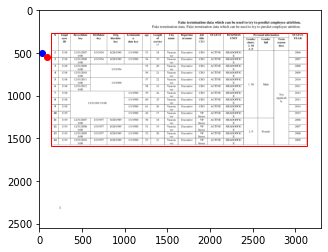

In [21]:
f = camelot.plot(tables[0], kind='contour')
f.set_frameon(False)
#nx = int(f.get_figwidth(), * f.dpi)
#ny = int(f.get_figheight(), * f.dpi)
#print(nx)
#print(ny)
plt.scatter(34.08, 498.96, c='b')
plt.scatter(89.03999999999999, 546.12, c='r')
#plt.scatter(0.1868137254901961+0.6513725490196078, 0.125+0.755, c='r')
print(f.axes[0].get_position())
print(f.axes[0].get_position().bounds)
print(f.axes[0].get_yticklabels())

In [15]:
layout, dim = camelot.utils.get_page_layout(file)
layout, dim 

C:\Users\Julia\AppData\Local\Temp\ipykernel_12980\3259206825.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='text').show()


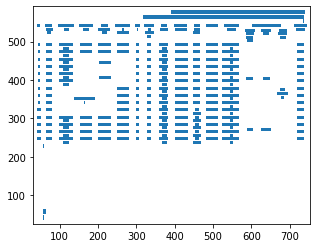

In [64]:
camelot.plot(tables[0], kind='text').show()

In [19]:
for row in tables[0].cells:
    for cell in row:
        print(cell.x1, cell.y1, cell.x2, cell.y2)

34.08 498.96 89.03999999999999 546.12
89.03999999999999 498.96 143.28 546.12
143.28 498.96 238.32 546.12
238.32 498.96 519.12 546.12
519.12 498.96 573.6 546.12
573.6 498.96 752.64 546.12
34.08 383.52 89.03999999999999 498.96
89.03999999999999 383.52 143.28 498.96
143.28 383.52 238.32 498.96
238.32 383.52 519.12 498.96
519.12 383.52 573.6 498.96
573.6 383.52 752.64 498.96
34.08 309.84 89.03999999999999 383.52
89.03999999999999 309.84 143.28 383.52
143.28 309.84 238.32 383.52
238.32 309.84 519.12 383.52
519.12 309.84 573.6 383.52
573.6 309.84 752.64 383.52
34.08 232.07999999999998 89.03999999999999 309.84
89.03999999999999 232.07999999999998 143.28 309.84
143.28 232.07999999999998 238.32 309.84
238.32 232.07999999999998 519.12 309.84
519.12 232.07999999999998 573.6 309.84
573.6 232.07999999999998 752.64 309.84


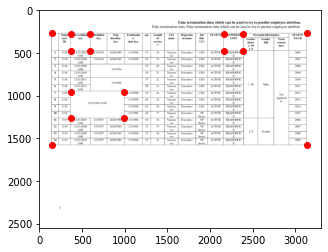

In [41]:
fig = camelot.plot(tables[0], kind='joint') #.show()

In [20]:
tables[0].shape

(4, 6)

In [45]:
#table_regions=['170,370,560,270'] from background substr
tables2 = camelot.read_pdf(file, flavor='stream', strip_text=' .\n', split_text=True, )  # row_tol=1)

C:\Users\Julia\AppData\Local\Temp\ipykernel_12980\349893448.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables2[0], kind='grid').show()


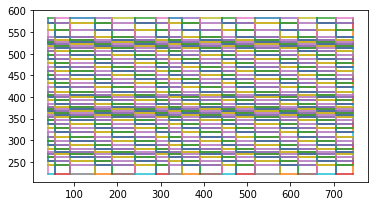

In [49]:
camelot.plot(tables2[0], kind='grid').show()

In [19]:
tables2[0].to_excel("table_result2.xlsx", index=False)